<a href="https://colab.research.google.com/github/Jonathan-code-hub/MAT-422-Math-Methods-in-Data-Science/blob/main/homework_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QR decomposition

In [ ]:
import numpy as np

def qr_decomposition(A):
    """
    Performs QR decomposition of a matrix A.

    Parameters:
    A -- The input matrix.

    Returns:
    Q -- The orthogonal matrix Q.
    R -- The upper triangular matrix R.
    """

    A = A.astype(np.float64)

    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for j in range(n):
        v = A[:, j]
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])
            v = v - R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]

    return Q, R

# Testing #
A = np.array([[1, -1, 1], [1, 5, -1], [1, 3, 2]])
Q, R = qr_decomposition(A)

print("Matrix A:")
print(A)
print("\nQ (orthogonal matrix):")
print(Q)
print("\nR (upper triangular matrix):")
print(R)

Matrix A:
[[ 1 -1  1]
 [ 1  5 -1]
 [ 1  3  2]]

Q (orthogonal matrix):
[[ 0.57735027 -0.77151675 -0.26726124]
 [ 0.57735027  0.6172134  -0.53452248]
 [ 0.57735027  0.15430335  0.80178373]]

R (upper triangular matrix):
[[ 1.73205081  4.04145188  1.15470054]
 [ 0.          4.3204938  -1.08012345]
 [ 0.          0.          1.87082869]]


Least-squares Problems and Linear Regression

Linear regression coefficients: [ 2.2 -1. ]
Quadratic regression coefficients: [ 0.42857143 -0.37142857  2.        ]
Cubic regression coefficients: [ 0.08333333 -0.32142857  1.5952381   0.6       ]


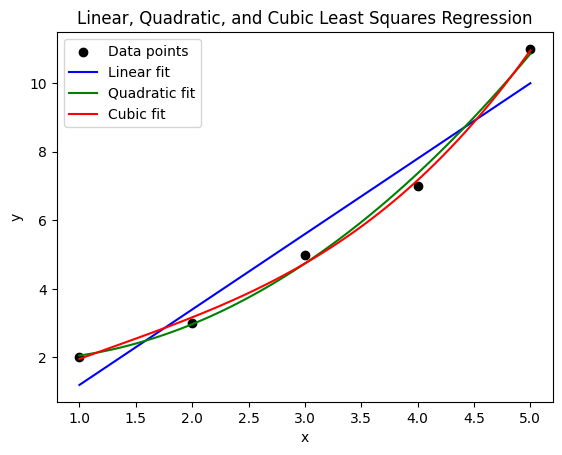

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def linear_least_squares(x, y):
    """
    Performs linear least squares regression on the given data points (x, y).

    Parameters:
    x -- The x-coordinates of the data points.
    y -- The y-coordinates of the data points.

    Returns:
    coeffs -- The coefficients of the linear regression equation.
    """

    A = np.vstack([x, np.ones(len(x))]).T
    coeffs = np.linalg.inv(A.T @ A) @ A.T @ y
    return coeffs

def quadratic_least_squares(x, y):
    """
    Performs quadratic least squares regression on the given data points (x, y).

    Parameters:
    x -- The x-coordinates of the data points.
    y -- The y-coordinates of the data points.

    Returns:
    coeffs -- The coefficients of the quadratic regression equation.
    """

    A = np.vstack([x**2, x, np.ones(len(x))]).T
    coeffs = np.linalg.inv(A.T @ A) @ A.T @ y
    return coeffs

def cubic_least_squares(x, y):
    """
    Performs cubic least squares regression on the given data points (x, y).

    Parameters:
    x -- The x-coordinates of the data points.
    y -- The y-coordinates of the data points.

    Returns:
    coeffs -- The coefficients of the cubic regression equation.
    """

    A = np.vstack([x**3, x**2, x, np.ones(len(x))]).T
    coeffs = np.linalg.inv(A.T @ A) @ A.T @ y
    return coeffs

# Testing #
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 7, 11])

# Linear regression #
linear_coeffs = linear_least_squares(x, y)
print("Linear regression coefficients:", linear_coeffs)

# Quadratic regression #
quadratic_coeffs = quadratic_least_squares(x, y)
print("Quadratic regression coefficients:", quadratic_coeffs)

# Cubic regression #
cubic_coeffs = cubic_least_squares(x, y)
print("Cubic regression coefficients:", cubic_coeffs)

# Plotting #
plt.scatter(x, y, color='black', label='Data points')

# Linear plot #
x_range = np.linspace(min(x), max(x), 100)
linear_fit = linear_coeffs[0] * x_range + linear_coeffs[1]
plt.plot(x_range, linear_fit, label='Linear fit', color='blue')

# Quadratic plot #
quadratic_fit = quadratic_coeffs[0] * x_range**2 + quadratic_coeffs[1] * x_range + quadratic_coeffs[2]
plt.plot(x_range, quadratic_fit, label='Quadratic fit', color='green')

# Cubic plot #
cubic_fit = cubic_coeffs[0] * x_range**3 + cubic_coeffs[1] * x_range**2 + cubic_coeffs[2] * x_range + cubic_coeffs[3]
plt.plot(x_range, cubic_fit, label='Cubic fit', color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Linear, Quadratic, and Cubic Least Squares Regression')
plt.show()
